# Task 2 Regression Exercise - Ander Carrera

This exercise will analyze the dataset of bmw cars. The file contains information of the price, transmission, mileage, fuel
type, road tax, miles per gallon (mpg), and engine size for each BMW car. The variable to be predicted is the price of the cars.

## 1. EDA

Now we are going to analyze each variable and show 5 examples of each:

### These are the entry variables more in depth of the bmw.csv dataset:

Model: The model of the car (Categorical)
 * 5 Series
 * 6 Series
 * 5 Series
 * 1 Series
 * 7 Series

Year: The selling year of the car (Numeric, Discrete)
 * 2014
 * 2018
 * 2016
 * 2017
 * 2014

Transmission: The type of transmission that the car has (Categorical)
 * Automatic
 * Semi-Auto
 * Semi-Auto
 * Manual
 * Semi-Auto

Mileage: The amount of miles that the car has traveled (Numeric, continuous)
 * 67068
 * 14827
 * 62794
 * 26676
 * 39554

FuelType: The type of fuel that the car uses for consumption (Categorical)
 * Diesel
 * Petrol
 * Diesel
 * Diesel
 * Diesel

Tax: the amount of money that the car has to pay as tax (Numeric, continuous)
 * 125
 * 145
 * 160
 * 145
 * 160

Mgp (Miles per gallon) The amount of miles that travels per fuel gallon (Continuous)
 * 57.6
 * 42.8
 * 51.4
 * 72.4
 * 50.4

EngineSize: the size of an engine, usually measured by the amount of cillinders that the engine have (Numeric, Continuous)
 * 2.0
 * 2.0
 * 3.0
 * 1.5
 * 3.0

### This is the output (model) we want to predict of the bmw.csv dataset:

Price: The price of the car (Numeric, continuous)
 * 11200
 * 27000
 * 16000
 * 12750
 * 14500

In [1427]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [1428]:
df = pd.read_csv('./data/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [1429]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


**The first question we must answer is: what type of variable is the output variable? By answering this question we will know the type of problem we have. In this case, since price is a numerical variable, we are dealing with a regression problem**.

In [1430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


With this information we can already deduce that practically all the variables are relevant, since there are no missing values.

## Data distribution

Let's see what types of data we have in the dataset, and we will plot those which are numeric

In [1431]:
list(set(df.dtypes.tolist()))


[dtype('float64'), dtype('int64'), dtype('O')]

In [1432]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0


Let's plot them

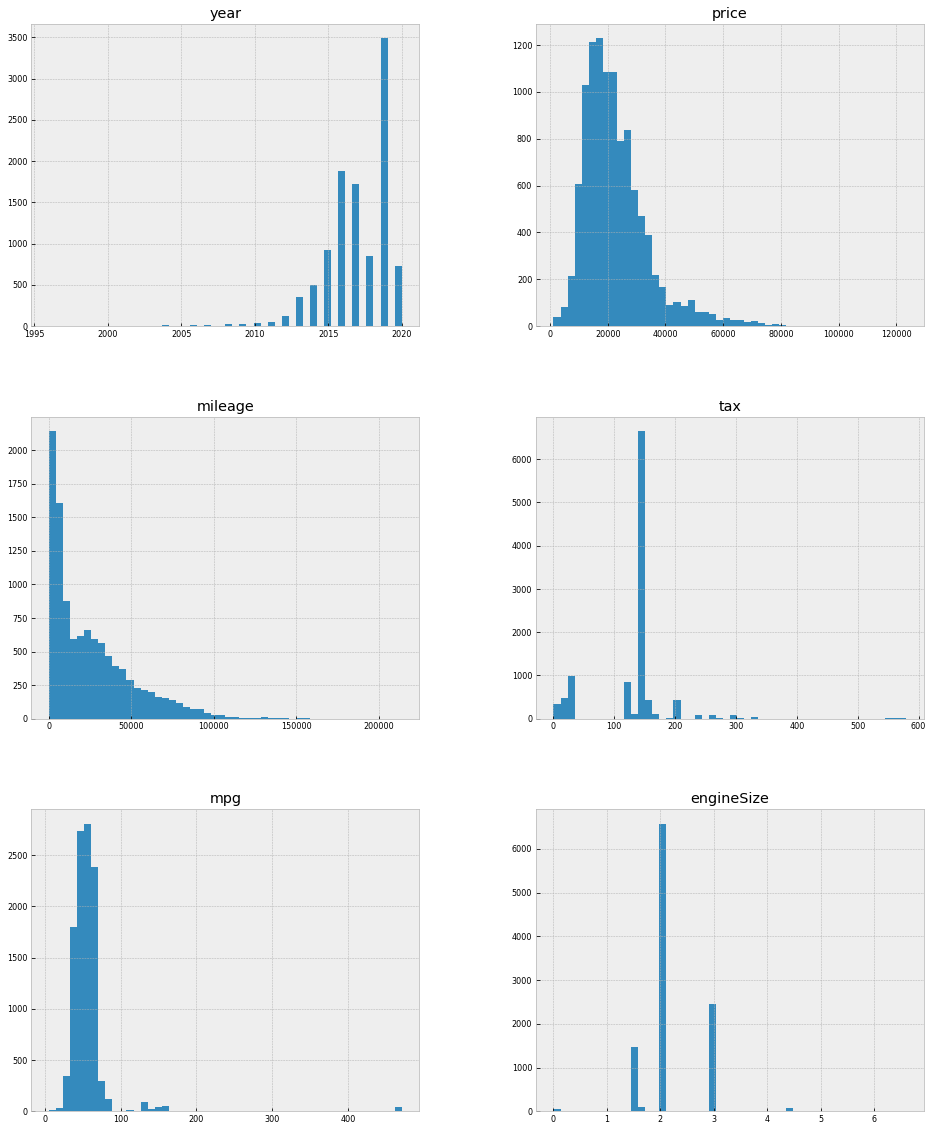

In [1433]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8,
            ylabelsize=8);  # ; avoid having the matplotlib verbose informations

These are some initial conclusions:
* Year: data is skewed to the left. There is a clear difference in 2019, which is the year where the most cars were sold
* Price: Data skewed to the right. We will analyze this more in depth in the following cells as it is the output variable.
* Mileage: Data skewed to the left. A large part of the cars have a mileage from 0 to 10000. It makes sense, since as we have seen recently in the Year variable, the vast majority of cars have been sold in 2019.
* Tax: Data skewed to the center-right. The value around 140 clearly stands out, since most of the data is concentrated there.
* MPG: Data skewed to the right. The distribution is not very wide, since practically all values are concentrated between approximately 30 and 80. We can appreciate an input error around 450 mpg, as it is almost impossible that a car can reach those consumption levels
* Engine size: Data skewed to the center-right. We can clearly see that most of the cars have a 2.0 engine.

Some general conclusions we can draw are that many cars that have been sold are fairly new (2019). Consequently, the mileage is also quite low in general. In addition, we can deduce that most cars are mid-range as most data are between 10000 and 40000 euros. Also almost all cars pay a tax of 140. Finally, we can deduce that they all have a similar consumption around 30 and 80 and that most cars have a 3-cylinder engine.

Let's remove the input error above 400 in mpg and plot them again

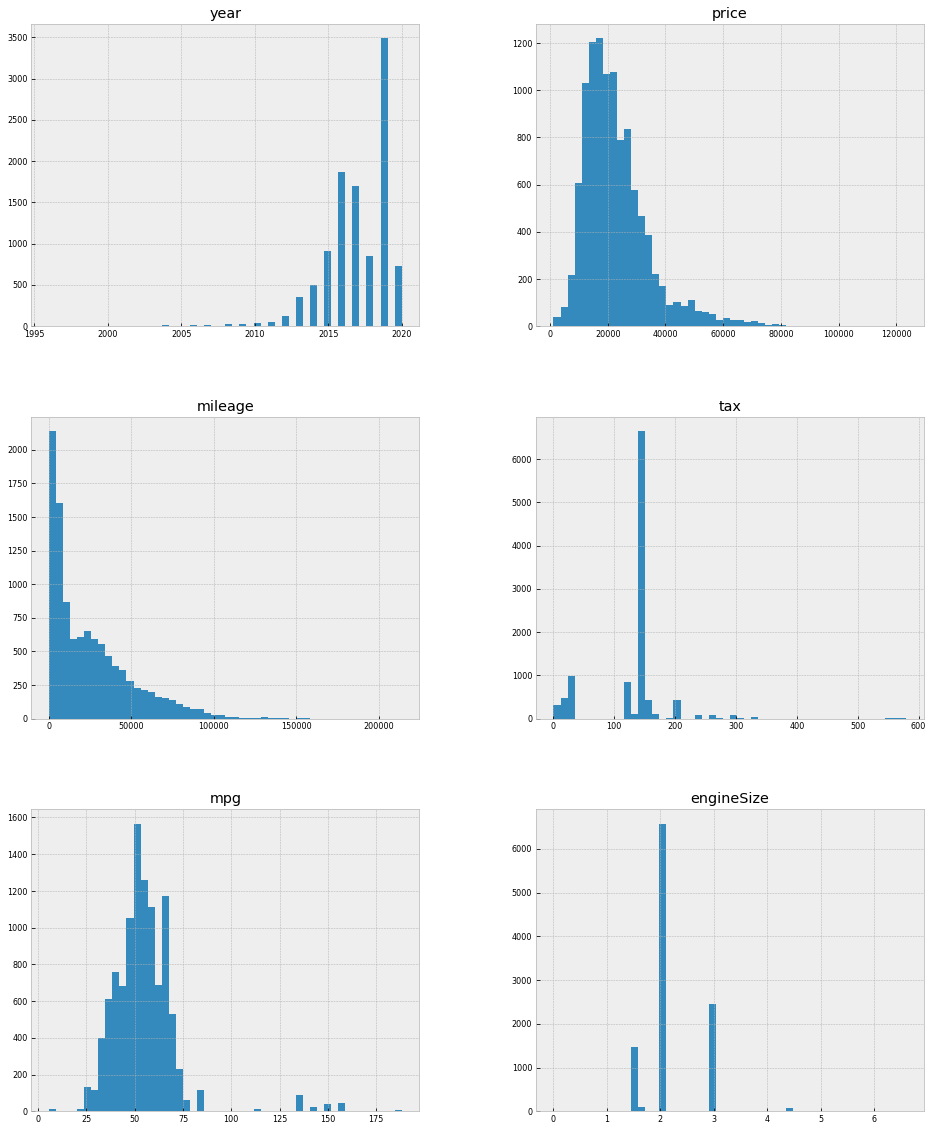

In [1434]:
indexNames = df_num[df_num['mpg'] > 400 ].index
# Delete these row indexes from dataFrame
df_num.drop(indexNames , inplace=True)

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8,
            ylabelsize=8);  # ; avoid having the matplotlib verbose informations

Let's look at the price distribution of the cars:

count     10738.000000
mean      22749.692215
std       11434.244021
min        1200.000000
25%       14940.250000
50%       20490.000000
75%       27950.000000
max      123456.000000
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='Count'>

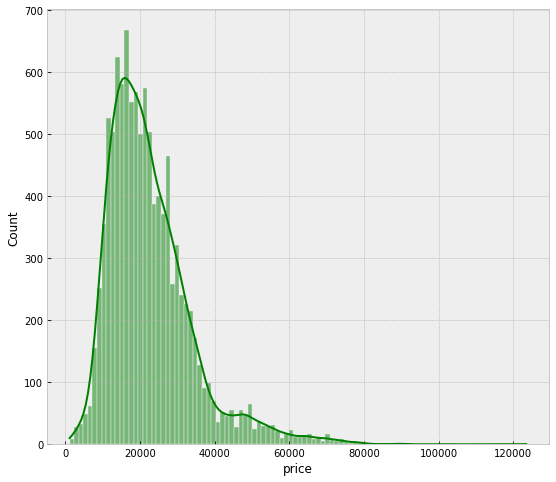

In [1435]:
print(df_num['price'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df_num['price'], color='g', bins=100, kde=True)

In this graph we can see that the data are skewed to the right, let's look at the possible outliers

Q1: 14940.25
Q3: 27950.0
Median: 20490.0
IQR: 13009.75
Outliers starting from: 47440


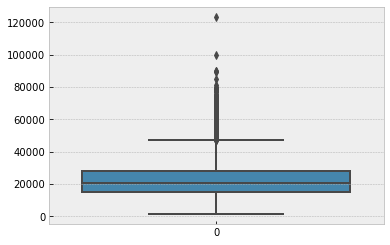

In [1436]:
sns.boxplot(data=df_num['price'])

median = np.median(df_num['price'])
Q3 = np.percentile(df_num['price'], 75)
Q1 = np.percentile(df_num['price'], 25)

print("Q1:",Q1)
print("Q3:",Q3)


iqr = Q3 - Q1
print("Median:",median)
print("IQR:",iqr)

upper_whisker = df_num['price'][df_num['price']<=Q3+1.5*iqr].max()
print("Outliers starting from:", upper_whisker)





According to this graph, we can see that there are outliers starting from 47250. Most of the outliers are agglutinated, but there are 2 variables that stand out from the rest, which are the ones starting from 100k and above, so these ones might be interesting to delete:

count    10737.000000
mean     22740.312843
std      11393.391788
min       1200.000000
25%      14940.000000
50%      20490.000000
75%      27950.000000
max      99950.000000
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='Count'>

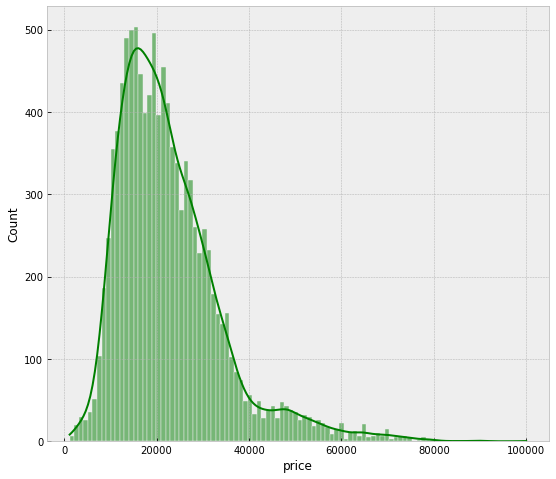

In [1437]:
indexNames = df_num[df_num['price'] > 100000 ].index
# Delete these row indexes from dataFrame
df_num.drop(indexNames , inplace=True)

print(df_num['price'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df_num['price'], color='g', bins=100, kde=True)

Q1: 14940.0
Q3: 27950.0
Median: 20490.0
IQR: 13010.0
Outliers starting from: 47440


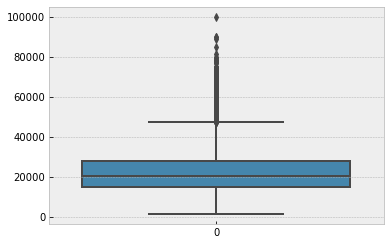

In [1438]:
sns.boxplot(data=df_num['price'])

median = np.median(df_num['price'])
Q3 = np.percentile(df_num['price'], 75)
Q1 = np.percentile(df_num['price'], 25)

print("Q1:",Q1)
print("Q3:",Q3)


iqr = Q3 - Q1
print("Median:",median)
print("IQR:",iqr)

upper_whisker = df_num['price'][df_num['price']<=Q3+1.5*iqr].max()
print("Outliers starting from:", upper_whisker)


In [1439]:
df_num_corr = df_num.corr()['price']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Price:\n{}".format(len(golden_features_list),
                                                                           golden_features_list))

There is 3 strongly correlated values with Price:
price      1.000000
year       0.626562
mileage   -0.607921
Name: price, dtype: float64


### Correlations

We have found 2 variables that correlate strongly with price. With Year it has a direct correlation and with Millage it has an inverse correlation. Obviously, when correlating all variables, the correlation with price will always be 1 because it is the same variable.

The correlation factor alone does not always explain the relationship between variables, but plotting them can help to discover trends.

For example, a curvilinear relationship could not be discovered by looking at the correlation factor alone.

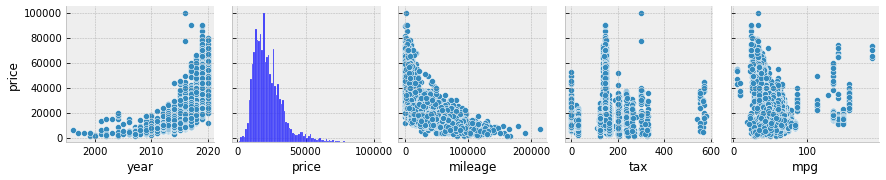

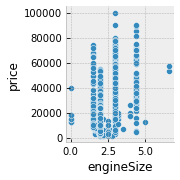

In [1440]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i + 5],
                 y_vars=['price'])

With year price has a direct correlation and with Millage price has an inverse correlation.

With this we can conclude that the newer the car, the higher the price, and the more mileage a car has, the lower the price.

Let's look at the multivariate correlation. In this case, instead of plotting all pairs of variables, we will plot everything on a single graph, as it may be easier to interpret.

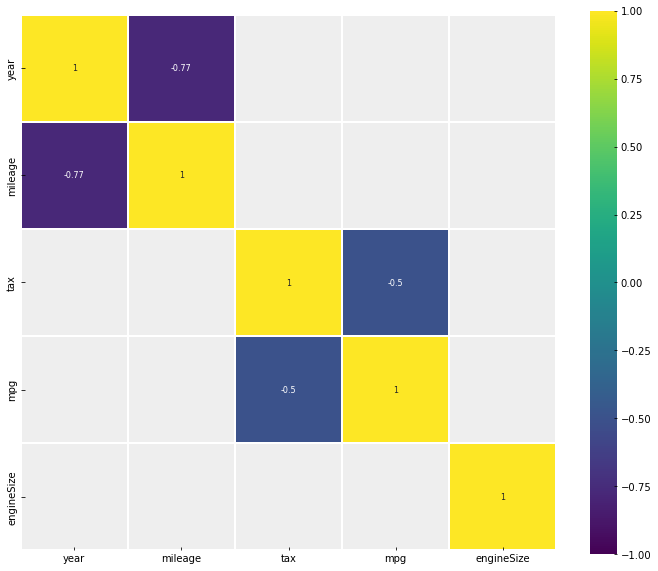

In [1441]:
corr = df_num.drop('price', axis=1).corr()  # We already examined price correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Through this graph we can observe two inverse correlations:
* mileage-year: The more mileage a car has, the lower its selling year value will be. For example, a car that has been sold in 2010, will have a higher mileage, compared to a car that has been sold in 2020, which will have a higher mileage. Do not confuse the value of the year with how long ago it was sold.
* Tax-Mpg: The more a car consumes, the more taxes will have to be paid.

We can also conclude that there is an irrelevant feature, which is the size of the engine. In principle, one might think that the larger the engine, the higher the fuel consumption, but the graph above shows that there is no correlation between these two variables.

## 2. Prepare the data for training

**Should you scale the data?**

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

In this case, as the variable to predict is the price, and therefore, the distance between the price points is relevant, we should consider standardization.

The most common techniques of feature scaling are Normalization and Standardization.


**Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. It is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1].

**Standardization** can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


**Why do we need scaling?**

Machine learning algorithems just see numbers — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training/testing the model.

Since our data does not follow a Gaussian distribution, we will proceed to normalize our data.

In [1442]:
from sklearn import preprocessing

df_norm=((df_num-df_num.min())/(df_num.max()-df_num.min()))
df_norm.head()

,year,price,mileage,tax,mpg,engineSize
0,0.750000,0.101266,0.313399,0.215517,0.285011,0.303030
1,0.916667,0.261266,0.069281,0.250000,0.204048,0.303030
2,0.833333,0.149873,0.293427,0.275862,0.251094,0.454545
3,0.875000,0.116962,0.124650,0.250000,0.365974,0.227273
4,0.750000,0.134684,0.184828,0.275862,0.245624,0.454545


We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [1443]:
from sklearn.model_selection import train_test_split

X = df_norm.drop('price', axis=1).values
y = df_norm.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Training and model evaluation

Next up, we will train three different models and evaluate each one with the following metrics: MAE, MSE and RMSE:
- mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. It has the same unit as the original data, and it can only be compared between models whose errors are measured in the same units.
- Mean Squared Error (MSE) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.
- In statistical modeling and particularly regression analyses, a common way of measuring the quality of the fit of the model is the RMSE (also called Root Mean Square Deviation). If the predicted responses are very close to the true responses the RMSE will be small. If the predicted and true responses differ substantially — at least for some observations — the RMSE will be large. A value of zero would indicate a perfect fit to the data.

And we will also plot the results of the actual data vs predicted data.

In [1444]:
def evaluate_model(y_pred, y_test):
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [1445]:
def plot_results(y_test_label, y_pred):
    x_ax = range(len(y_test_label))
    plt.plot(x_ax, y_test_label, linewidth=1, label="original")
    plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
    plt.title("y-test and y-predicted data")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

### 3.1. Linear Regression

Linear regression performs the task to predict a dependent variable(target) based on the given independent variable(s). So, this regression technique finds out a linear relationship between a dependent variable and the other given independent variables.

Pros:
- Linear Regression is simple to implement.
- Less complexity compared to other algorithms.
- Linear Regression may lead to over-fitting but it can be avoided using some dimensionality reduction techniques, regularization techniques, and cross-validation.

Cons:
- Outliers affect this algorithm badly.
- It over-simplifies real-world problems by assuming a linear relationship among the variables, hence not recommended for practical use-cases.

In [1446]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test)

Mean Absolute Error: 0.04414089548326736
Mean Squared Error: 0.004135025910900641
Root Mean Squared Error: 0.0643041671348027
Average Error: 0.0441 degrees.
Accuracy = 73.41%.


https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

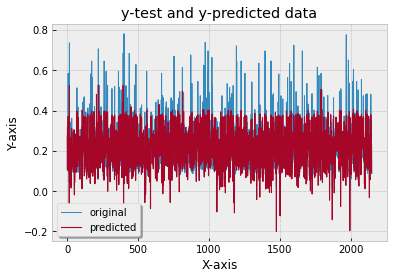

In [1447]:
plot_results(y_test, y_pred)

### 3.2. Decision Tree
 Decision trees are good at capturing non-linear interaction between the features and the target variable. Decision trees somewhat match human-level thinking so it’s very intuitive to understand the data.

Pros:
- Easy to understand and interpret, visually intuitive.
- It can work with numerical and categorical features.
- Requires little data preprocessing: no need for one-hot encoding, dummy variables, etc.

Cons:
- It tends to overfit.
- A small change in the data tends to cause a big difference in the tree structure, which causes instability.

In [1448]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test)

Mean Absolute Error: 0.026218270008519638
Mean Squared Error: 0.00167435424107691
Root Mean Squared Error: 0.040918873897957043
Average Error: 0.0262 degrees.
Accuracy = 87.13%.


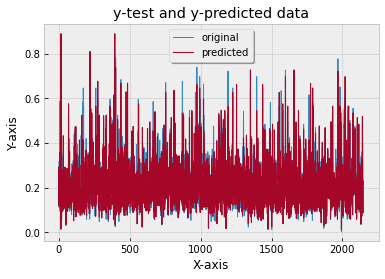

In [1449]:
plot_results(y_test, y_pred)

### 3.3. Random Forest
Random Forests are an ensemble(combination) of decision trees. It is a Supervised Learning algorithm used for classification and regression. The input data is passed through multiple decision trees. It executes by constructing a different number of decision trees at training time and outputting the class that is the mode of the classes (for classification) or mean prediction (for regression) of the individual trees.

Pros:
- Good at learning complex and non-linear relationships
- Very easy to interpret and understand

Cons:
- They are prone to overfitting
- Using larger random forest ensembles to achieve higher performance slows down their speed and then they also need more memory.


With this technique, we are going to do some parameter tuning as well, which is going to consist on determining the sweet spot of the level of the trees.

In [1450]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(bootstrap=True, max_depth=3)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test)

Mean Absolute Error: 0.03866439717990595
Mean Squared Error: 0.002768094759588246
Root Mean Squared Error: 0.05261268629891697
Average Error: 0.0387 degrees.
Accuracy = 76.93%.


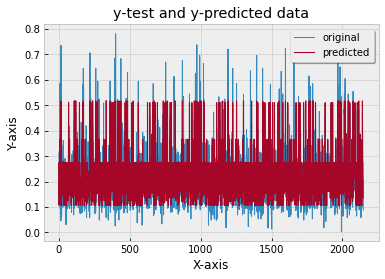

In [1451]:
plot_results(y_test, y_pred)

In [1452]:
regressor = RandomForestRegressor(bootstrap=True, max_depth=30)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test)

Mean Absolute Error: 0.02241673115269045
Mean Squared Error: 0.001185268540309873
Root Mean Squared Error: 0.03442772923545602
Average Error: 0.0224 degrees.
Accuracy = 89.05%.


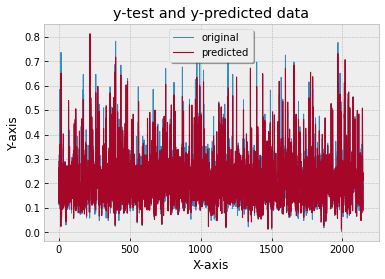

In [1453]:
plot_results(y_test, y_pred)

In [1454]:
regressor = RandomForestRegressor(bootstrap=True, max_depth=13)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test)

Mean Absolute Error: 0.021975316604602453
Mean Squared Error: 0.0011226600885384536
Root Mean Squared Error: 0.03350612016540342
Average Error: 0.0220 degrees.
Accuracy = 89.29%.


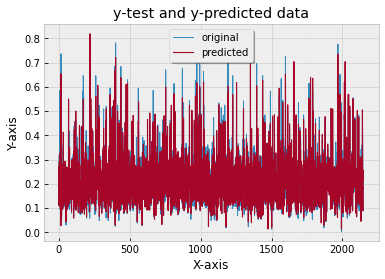

In [1455]:
plot_results(y_test, y_pred)

### Improving the model

We've seen that the RandomForest algorithm has performed the best, but let's see if we can make it work even better.

There are some parameters of random forest that can be tuned for the model’s better performance.

- **n_estimators**: The more trees, the less likely the algorithm is to overfit. So try increasing this parameter. The lower this number, the closer the model is to a decision tree, with a restricted feature set.
- **max_features**: You should try reducing this number. This defines how many features each tree is randomly assigned.
- **max_depth**: This parameter will reduce the complexity of the learned models, lowering over fitting risk.
- **min_samples_leaf**: Try setting these values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

### Important features

The following Python code creates a list of tuples where each tuple is a pair, (feature name, importance). The code here takes advantage of some neat tricks in the Python language, namely list comprehensive, zip, sorting, and argument unpacking.

In [1456]:
features = df_num.drop('price', axis=1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: year                 Importance: 0.46
Variable: engineSize           Importance: 0.28
Variable: mpg                  Importance: 0.16
Variable: mileage              Importance: 0.09
Variable: tax                  Importance: 0.02


[None, None, None, None, None]

These stats definitely prove that some variables are much more important to our problem than others! let’s make a quick graph to represent the relative differences in feature importances.

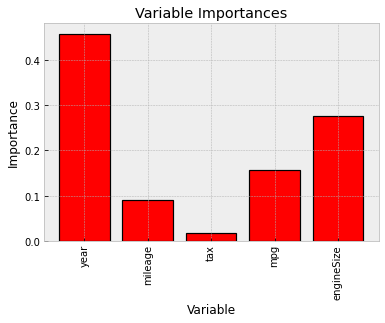

In [1457]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

We could try deleting those features which are under x importance, and see if our model improves. But seeing that for now we have little features, we should take this into account, that deleting features would lead into too little information to determine our model.

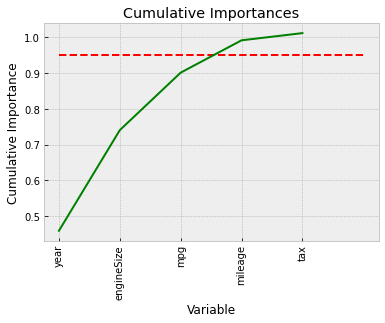

In [1458]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [1464]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 4


In [1460]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:3]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = X_train[:, important_indices]
important_test_features = X_test[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (8589, 3)
Important test features shape: (2148, 3)


In [1465]:
# Train the expanded model on only the important features
regressor.fit(important_train_features, y_train);
# Make predictions on test data
predictions = regressor.predict(important_test_features)
# Performance metrics
errors = abs(predictions - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.02 degrees.
Accuracy: 87.45 %.


We have just seen that the model has not improved at all.